1. Chelsea's restaurant locates at (latitude, longitude) = (0.2, 0). Plot the location of these customers as well as Chelsea's restaurant, mark them with different color.

In [20]:
using Pkg
using Random
Pkg.add("Statistics")
using Statistics
Pkg.add("LinearAlgebra")
using LinearAlgebra
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.6\Manifest.toml`


In [33]:
Random.seed!(8)
X=vcat( [ [0, -0.2] + 0.1*randn(2) for i = 1:30 ],
[ [0.5, 0.5] + 0.1*randn(2) for i = 1:30 ],
[ [0.5, -0.5] + 0.1*randn(2) for i = 1:20 ],
[ [0, 0.4] + 0.06* randn(2) for i = 1:20])

100-element Vector{Vector{Float64}}:
 [-0.0007623430669065629, 0.009083891311486209]
 [0.23397892123412833, -0.2567237096385192]
 [-0.1254084243281689, -0.2665048908395933]
 [0.044190418977343354, -0.20414577119019825]
 [0.06387266010923912, -0.12247328658767646]
 [0.03338882862631312, -0.2891679624399751]
 [0.10512827805165292, -0.2870874010054081]
 [0.048004944259331356, -0.31429028953954397]
 [-0.05444911528905593, -0.34435617695200527]
 [0.07064255872743337, -0.18770599521502662]
 [-0.005063343787261334, -0.18098817031126196]
 [-0.17352339405837514, -0.16607706600597777]
 [-0.07615134707832644, -0.12719776035934643]
 ⋮
 [0.0441122529343332, 0.37680232840460504]
 [-0.038343646009791586, 0.5682056282997349]
 [0.04295598758842651, 0.48853848825120616]
 [-0.02087363636244124, 0.3467718613477879]
 [-0.010389143993077039, 0.41151132462588996]
 [0.05332470971699341, 0.3672850007586912]
 [-0.07329481518304938, 0.3915301362670278]
 [-0.07617292114818593, 0.4203676629729118]
 [-0.05721879493

1. Chelsea's restaurant locates at (latitude, longitude) = (0.2, 0). Plot the location of these customers as well as Chelsea's restaurant, mark them with different color.

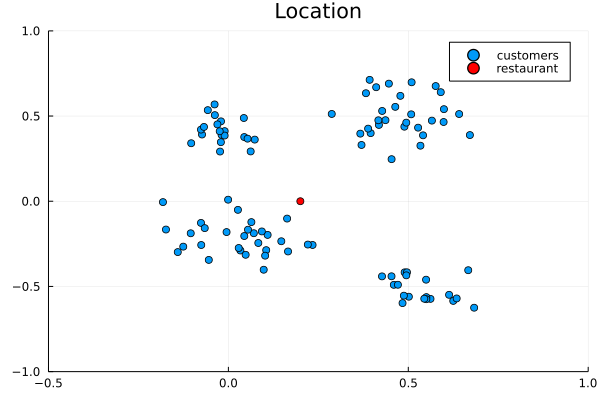

In [78]:
scatter([x[1] for x in X], [x[2] for x in X],title = "Location",label = "customers" )
scatter!([0.2], [0], color = "red",label= "restaurant")
plot!(grid = true,xlims = (-0.5,1), ylims = (-1,1))

***

2. Following question 1, help Chelsea with the following problems.

a. What is are all distances (in terms of 2-norm) between Chelsea's restaurant and
all her customers?

In [16]:
all_dis=0
for i =1:100
    all_dis=all_dis+norm(X[i]-[0.2,0])
end
println("All distances between Chelsea's restaurant and all her customers: ",all_dis)

All distances between Chelsea's restaurant and all her customers: 48.125324427986484


b. Who is the closest customer to Chelsea's restaurant in terms of 2-norm?

In [73]:
function closest_customer(c,X)
    ans=X[argmin([norm(c-x) for x in X])]
    println(ans)  
end
closest_customer([0.2,0],X)

[0.1631913583396738, -0.10180881669816223]


c. 1-norm in R2 is calculated as ||x||1 = |x1| + |x2| for x= (x1, x2), what is the farthest
customer to Chelsea's restaurant in terms of 1-norm?

In [67]:
function farthest_customer(c,X)
    ans=X[argmax([abs.(x[1]-c[1])+abs.(x[2]-c[2]) for x in X])]
    println(ans)  
end
farthest_customer([0.2,0],X)

[0.6830379034422798, -0.6249232890169918]


d. Are the 5 closest customers to Chelsea's restaurant calculated using 1-norm and
2-norm the same?

In [80]:
function closest_customer(c,X)
    data=copy(X)
    for i=1:5
        ans=data[argmin([norm(c-x) for x in data])]
        println(ans)  
        deleteat!(data, argmin([norm(c-x) for x in data]))
    end
end
closest_customer([0.2,0],X)

[0.1631913583396738, -0.10180881669816223]
[0.026490532711156752, -0.05055731203099234]
[0.06387266010923912, -0.12247328658767646]
[-0.0007623430669065629, 0.009083891311486209]
[0.09297324762736565, -0.17723937151993646]


In [85]:
function Norm1_customer(c,X)
    data=copy(X)
    for i=1:5
        ans=data[argmin([abs.(x[1]-c[1])+abs.(x[2]-c[2]) for x in data])]
        println(ans)  
        deleteat!(data,argmin([abs.(x[1]-c[1])+abs.(x[2]-c[2]) for x in data]))
    end
end
Norm1_customer([0.2,0],X)

[0.1631913583396738, -0.10180881669816223]
[-0.0007623430669065629, 0.009083891311486209]
[0.026490532711156752, -0.05055731203099234]
[0.06387266010923912, -0.12247328658767646]
[0.22081838084809619, -0.25430836935157797]


No,they aren't same.

***

3. Following question 1, the magic ingredients are as follows: Chelsea wants to use the...Which data point is the farthest (in terms of 2-norm)to its prediction?

In [262]:
Random.seed!(8)
y = randn(100)
Random.seed!(8)
quality = y * 0.5 + rand(100) * 0.1
Random.seed!(10)
nutrition = y * 0.1 + rand(100) * 0.2
price = quality * 1 + nutrition * 0.1 + rand(100) * 2

100-element Vector{Float64}:
  0.602733654361563
  2.6222771630940667
  1.969013536333791
  0.36380313015970356
  0.351086250723602
  1.645326029601821
  1.2221107805415417
  1.928905190817197
  1.9146348627202372
  0.5514536359690569
  1.2415611779614413
 -0.029853290428121293
  2.504010132527215
  ⋮
  1.6623652080640692
 -0.11456802890069528
  1.4465801791723256
 -0.12610071604739398
 -0.11478550292537693
  1.232347043290465
  0.9710582288240228
  1.3387031555100077
  0.9923666163108907
  1.4965713470280297
  1.8150787256909398
  0.8968727173853056

In [263]:
pricehat = quality * 0.5 + nutrition * 7.1 .+0.1

100-element Vector{Float64}:
  0.25316646337621496
  2.6749256672598505
  2.8793648999701413
 -0.3256484444512163
 -0.8896978317742809
 -0.2666589464734834
  1.0922689996087491
  1.219925966200112
  1.0877376131745329
  2.0295199735872256
  1.3838077203235921
 -0.08974862627759245
  2.3535340700684144
  ⋮
  2.7281555898663448
 -0.05536557187355037
  2.2715985264619305
 -0.23178966104053358
  0.668516693892458
  0.16824781830492697
 -0.32104563245154893
  1.0392497801155014
 -1.1127149755689465
 -0.30058587348456955
  2.473356632478961
  0.03907553257622229

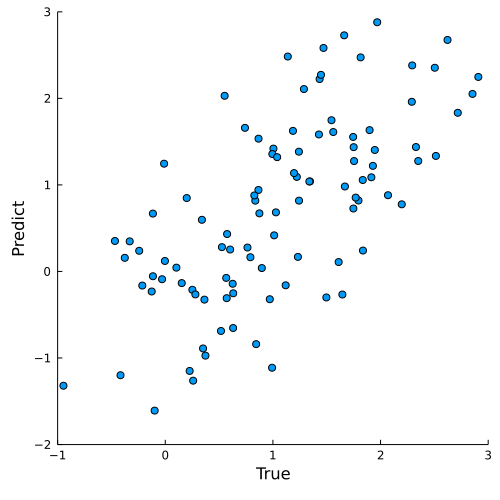

In [264]:
scatter(price, pricehat, xlabel = "True", ylabel="Predict")
plot!(legend = false, grid = false, size = (500,500),
xlims = (-1,3), ylims = (-2,3))

In [265]:
between = zeros(0)
for i=1:100
    append!(between,norm(price[i]-pricehat[i]))
end
between=hcat(price,pricehat,between)

100×3 Matrix{Float64}:
  0.602734    0.253166   0.349567
  2.62228     2.67493    0.0526485
  1.96901     2.87936    0.910351
  0.363803   -0.325648   0.689452
  0.351086   -0.889698   1.24078
  1.64533    -0.266659   1.91198
  1.22211     1.09227    0.129842
  1.92891     1.21993    0.708979
  1.91463     1.08774    0.826897
  0.551454    2.02952    1.47807
  1.24156     1.38381    0.142247
 -0.0298533  -0.0897486  0.0598953
  2.50401     2.35353    0.150476
  ⋮                      
  1.66237     2.72816    1.06579
 -0.114568   -0.0553656  0.0592025
  1.44658     2.2716     0.825018
 -0.126101   -0.23179    0.105689
 -0.114786    0.668517   0.783302
  1.23235     0.168248   1.0641
  0.971058   -0.321046   1.2921
  1.3387      1.03925    0.299453
  0.992367   -1.11271    2.10508
  1.49657    -0.300586   1.79716
  1.81508     2.47336    0.658278
  0.896873    0.0390755  0.857797

In [266]:
println("Farthest data point: \nTrue price:",between[argmax(between[:,3]),1]
    ,", Predict price:",between[argmax(between[:,3]),2],", Norm:",between[argmax(between[:,3]),3])

Farthest data point: 
True price:0.9923666163108907, Predict price:-1.1127149755689465, Norm:2.1050815918798373


---

4. Following question 1, Chelsea is retiring, three of her friends, Maximilian, Jemima, and...𝑘-means algorithm.





a&b. What is best location to open these three restaurants for Chelsea's franchisee, i.e., where are the three clustering centres?Mark these customers group with different colors and mark these new restaurants
on the map.

At first we choose points: 
[[0.1021669728081831, -0.31949793858886766], [0.49438308875003484, 0.4612680782400851], [0.5092531089033236, 0.6981824564768533]]
 at initial representive points.
J: 0.281438775037282
J: 0.2523085086001845
J: 0.22160937260276456
J: 0.20456165597997597
We iterate 4 times.
[[0.24612669308079801, -0.347697217247618], [-0.02363182591647646, 0.3747008276202827], [0.4792906462350338, 0.5022140724893905]]


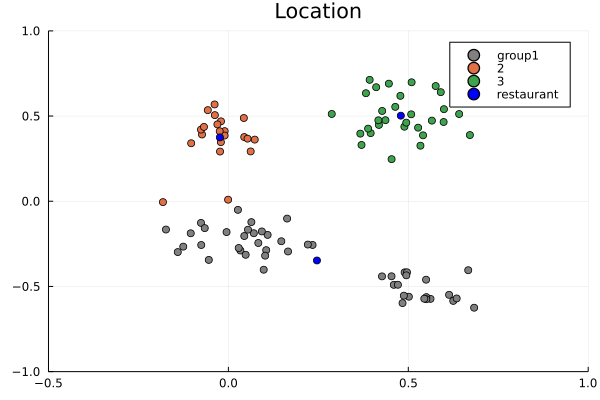

In [237]:
function kmean(k)  
    Random.seed!(8)
    data=copy(X)
    
    Group=zeros(100)
    Z=data[randperm(100)[1:k]]
    #Z=[data[45],data[73],data[1]]
    println("At first we choose points: \n",Z,"\n at initial representive points.")
    counter=0
    J_old=0
    partition=vcat([[.0,.0] for i = 1:k])
    
    while true
        J=0
        temp=vcat([[.0,.0] for i = 1:k])
        for i in 1:100
            Group[i]=argmin([norm(data[i]-z) for z in Z])
        end
        Data=hcat(data,Group)         
        
        for j in 1:k
            for i in 1:100 
                if Data[i,2]==j
                    temp[j]=temp[j]+Data[i,1]
                    J=J+norm(Data[i,1]-Z[j])
                end                        
            end
        end
        J=J/100
        
        for i in 1:k
            Z[i]=temp[i]/count(j->(j== i), Group)
        end
        
        if J>=J_old && counter>0
            partition = [[data[i] for i=1:100 if Group[i] == j] for j=1:k]
            break
        end
    
        println("J: ",J)
        counter=counter+1
        J_old=J

    end

    println("We iterate ", counter," times.")
    println(Z) 
    
    scatter([x[1] for x in partition[1]], [x[2] for x in partition[1]],label = "group1",color = "gray" )    
    for i in 2:k
        scatter!([x[1] for x in partition[i]], [x[2] for x in partition[i]],color = i,label = i)
    end
    scatter!([x[1] for x in Z], [x[2] for x in Z],title = "Location",label = "restaurant",color = "blue")
    plot!(grid = true,xlims = (-0.5,1), ylims = (-1,1))
end
kmean(3) 

3 centers: [0.24612669308079801, -0.347697217247618], [-0.02363182591647646, 0.3747008276202827], [0.4792906462350338, 0.5022140724893905]

c. Use 1-norm to measure distance in the 𝑘 -means algorithm. And plot the
customers on the map. Are they the same as (b)?

At first we choose points: 
[[0.1021669728081831, -0.31949793858886766], [0.49438308875003484, 0.4612680782400851], [0.5092531089033236, 0.6981824564768533]]
 at initial representive points.
J: 0.281438775037282
J: 0.25370150791953666
J: 0.23147064856208033
J: 0.21134586679219447
J: 0.2077885425064646
We iterate 5 times.
[[0.2579074365705538, -0.35895024685859395], [-0.02373170768873549, 0.33606929730232826], [0.4792906462350338, 0.5022140724893905]]


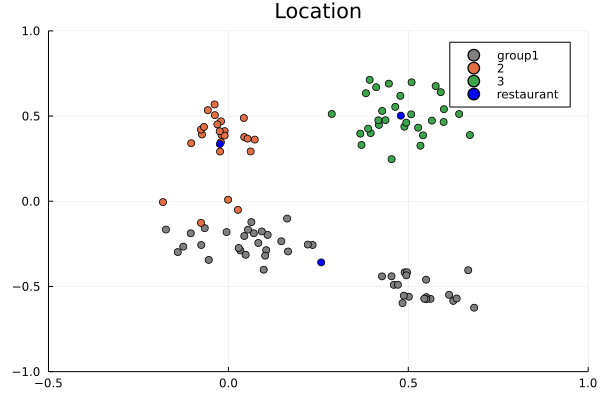

In [251]:
function Norm1_kmean(k)  
    Random.seed!(8)
    data=copy(X)
    
    Group=zeros(100)
    Z=data[randperm(100)[1:k]]
    #Z=[data[45],data[73],data[1]]
    println("At first we choose points: \n",Z,"\n at initial representive points.")
    counter=0
    J_old=0
    partition=vcat([[.0,.0] for i = 1:k])
   # println(Z)
    while true
        J=0
        temp=vcat([[.0,.0] for i = 1:k])
        for i in 1:100
            Group[i]=argmin([abs.(data[i][1]-c[1])+abs.(data[i][2]-c[2]) for c in Z])
        end
        Data=hcat(data,Group)         
        
        for j in 1:k
            for i in 1:100 
                if Data[i,2]==j
                    temp[j]=temp[j]+Data[i,1]
                    J=J+norm(Data[i,1]-Z[j])
                end                        
            end
        end
        J=J/100
        
        for i in 1:k
            Z[i]=temp[i]/count(j->(j== i), Group)
        end
        
        if J>=J_old && counter>0
            partition = [[data[i] for i=1:100 if Group[i] == j] for j=1:k]
            break
        end
    
        println("J: ",J)
        counter=counter+1
        J_old=J

    end

    println("We iterate ", counter," times.")
    println(Z) 
    
    scatter([x[1] for x in partition[1]], [x[2] for x in partition[1]],label = "group1",color = "gray" )    
    for i in 2:k
        scatter!([x[1] for x in partition[i]], [x[2] for x in partition[i]],color = i,label = i)
    end
    scatter!([x[1] for x in Z], [x[2] for x in Z],title = "Location",label = "restaurant",color = "blue")
    plot!(grid = true,xlims = (-0.5,1), ylims = (-1,1))
end
Norm1_kmean(3)

Well, a little different.

d. Do you think 3 is a good clustering number? Why?

At first we choose points: 
[[0.1021669728081831, -0.31949793858886766], [0.49438308875003484, 0.4612680782400851]]
 at initial representive points.
J: 0.2922538237361628
J: 0.280964248870938
We iterate 2 times.
[[0.2326289919850412, -0.33370928001324046], [0.2808290177102955, 0.46611675910208605]]
At first we choose points: 
[[0.1021669728081831, -0.31949793858886766], [0.49438308875003484, 0.4612680782400851], [0.5092531089033236, 0.6981824564768533]]
 at initial representive points.
J: 0.281438775037282
J: 0.2523085086001845
J: 0.22160937260276456
J: 0.20456165597997597
We iterate 4 times.
[[0.24612669308079801, -0.347697217247618], [-0.02363182591647646, 0.3747008276202827], [0.4792906462350338, 0.5022140724893905]]
At first we choose points: 
[[0.1021669728081831, -0.31949793858886766], [0.49438308875003484, 0.4612680782400851], [0.5092531089033236, 0.6981824564768533], [-0.023146785634296844, 0.29169150297903157]]
 at initial representive points.
J: 0.20302557403249885
J: 0.19378

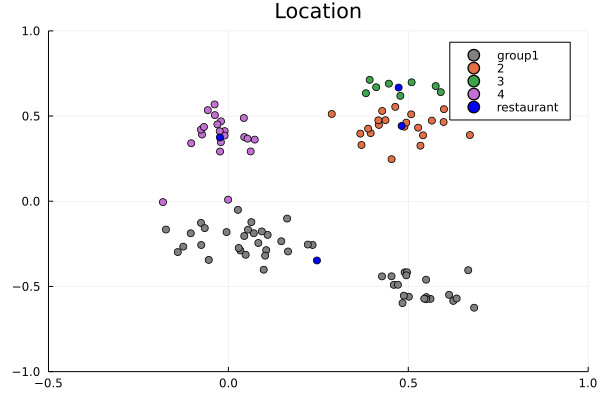

In [259]:
kmean(2)
kmean(3)
kmean(4)

In the condition of Random.seed!(8) and randperm(100)[1:k] ,I cosider that 3 is the good clustering number. Because of $J_2>>J_3>J_4$ .By the way,k-means is a heuristic algorithm so maybe exist a better solution. 

---

5. (Ida the mathematician) Write a function Gram_Schmidt that takes the input of anarray containing vectors. The function returns the orthonormal set of vectors when the input array contains vectors that are all linearly independent; otherwise, return “Vectors are linearly dependent.”.

In [1]:
function Gram_Schmidt(x)
    v1=x[1]*1.0
    final=v1
    for i in 2:length(x)
        vec=zeros(length(x[1]))
        for j in 1:i-1
            vec=vec+((x[i]'*x[j])/(x[j]'*x[j]))*x[j]
        end
        x[i]=x[i]-vec
        x[i]=x[i]
        if x[i]'x[i]==0
            return("Vectors are linearly dependent.")
        end
        final=hcat(final,x[i])
    end
    for i in 1:length(x)
        final[:,i]=(final[:,i]/sqrt(final[:,i]'*final[:,i]))
    end
    return(final)
    
end

Gram_Schmidt (generic function with 1 method)

In [14]:
a=[ [-1, 1, -1, 1], [-1, 3, -1, 3], [1, 3, 5, 7] ]
b=[[-1,1,0,1],[1,0,2,-1],[2.,0,0,-2]]
c=[[-1,1,0,1],[2.,0,0,-2],[1,0,2,-1]]

3-element Vector{Vector{Float64}}:
 [-1.0, 1.0, 0.0, 1.0]
 [2.0, 0.0, 0.0, -2.0]
 [1.0, 0.0, 2.0, -1.0]

In [15]:
Gram_Schmidt(a)

4×3 Matrix{Float64}:
 -0.5  0.5  -0.5
  0.5  0.5  -0.5
 -0.5  0.5   0.5
  0.5  0.5   0.5

In [13]:
Gram_Schmidt(b)

4×3 Matrix{Float64}:
 -0.57735   0.154303   0.377964
  0.57735   0.308607   0.755929
  0.0       0.92582   -0.377964
  0.57735  -0.154303  -0.377964

In [10]:
Gram_Schmidt(c)

"Vectors are linearly dependent."